# Implementación Módulo 2

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv("Datasets/processed_df.csv", sep=";")

In [15]:
df.isna().sum()

created_date          0
subreddit             0
title                 0
author                0
full_link             0
score                 0
post                  0
sentiment             0
lemmatized_post    1905
stemmed_post       1901
clean_post         1902
dtype: int64

Vemos que algunos posts al hacer el preprocesamiento como tenían solo caracteres no alfanumericos ahora contienen Nan.

Hay que eliminarlos

In [16]:
df.dropna(subset=["lemmatized_post"], inplace=True)

In [17]:
df.isna().sum()

created_date       0
subreddit          0
title              0
author             0
full_link          0
score              0
post               0
sentiment          0
lemmatized_post    0
stemmed_post       0
clean_post         0
dtype: int64

In [23]:
df

,created_date,subreddit,title,author,full_link,score,post,sentiment,lemmatized_post,stemmed_post,clean_post
0,2009-06-23 16:50:44,artificial,Are worms intelligent?,ithkuil,https://www.reddit.com/r/artificial/comments/8...,3,This is me trying to start thinking about my o...,0,trying start thinking understanding intelligen...,tri start think understand intellig idea mayb ...,trying start thinking understanding intelligen...
1,2009-07-01 23:59:58,statistics,Is a masters in Statistics worth it?,nazghash,https://www.reddit.com/r/statistics/comments/8...,8,I'm working on an MS in Statistics at a state ...,0,working statistic state school curious useful ...,work ms statist state school curiou use ultim ...,working ms statistics state school curious use...
2,2009-07-05 07:39:04,statistics,Books/resources that discuss change point anal...,Abhishek_Ghose,https://www.reddit.com/r/statistics/comments/8...,2,I am looking for books/online-resources that d...,1,looking booksonlineresources discus change poi...,look booksonlineresourc discuss chang point an...,looking booksonlineresources discuss change po...
3,2009-07-07 03:58:15,statistics,Pari-Mutuel Horse Racing Pool?,painperdu,https://www.reddit.com/r/statistics/comments/8...,0,Anyone study angles on how to beat a pari-mutu...,0,anyone study angle beat parimutuel pool horse ...,anyon studi angl beat parimutuel pool hors rac...,anyone study angles beat parimutuel pool horse...
4,2009-07-21 16:55:04,statistics,Ask Stats: I got a BS in stats and I'm startin...,mathsuu,https://www.reddit.com/r/statistics/comments/9...,0,I should mention that I know SAS and R pretty ...,0,mention know sa pretty well sa certified yet t...,mention know sa pretti well sa certifi yet tak...,mention know sas pretty well sas certified yet...
...,...,...,...,...,...,...,...,...,...,...,...
274198,2022-05-08 18:00:10,MachineLearning,[D] Simple Questions Thread,AutoModerator,https://www.reddit.com/r/MachineLearning/comme...,1,Please post your questions here instead of cre...,0,please post question instead creating new thre...,pleas post question instead creat new thread e...,please post questions instead creating new thr...
274199,2022-05-08 18:13:53,computerscience,Question about binary code and files identity,pc0999,https://www.reddit.com/r/computerscience/comme...,1,"Hi, \n\nI am a philosophy student writing an e...",0,hi philosophy student writing essay digital th...,hi philosophi student write essay digit thing ...,hi philosophy student writing essay digital th...
274200,2022-05-08 18:15:56,dataengineering,Creating a data pipeline in AWS,OinkOink9,https://www.reddit.com/r/dataengineering/comme...,1,I want to create a data pipeline in AWS (free-...,0,want create data pipeline aws freetier account...,want creat data pipelin aw freetier account us...,want create data pipeline aws freetier account...
274201,2022-05-08 19:01:40,dataengineering,I have a free pass to MLOps World in Toronto C...,Quiet_Basket_9699,https://www.reddit.com/r/dataengineering/comme...,1,You can see workshops etc www.MLOps world.com,1,see workshop etc,see workshop etc,see workshops etc


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

In [19]:
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(df.lemmatized_post)

In [20]:
df.subreddit.unique()

array(['artificial', 'statistics', 'MachineLearning', 'computervision',
       'rstats', 'analytics', 'datasets', 'computerscience',
       'AskStatistics', 'data', 'datascience', 'MLQuestions',
       'DataScienceJobs', 'deeplearning', 'dataengineering',
       'dataanalysis', 'learnmachinelearning', 'kaggle',
       'datascienceproject'], dtype=object)

In [21]:
encoder = LabelEncoder()
Y = encoder.fit_transform(df.subreddit)

##### Probamos diferentes modelos y nos quedamos con el mejor

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import time


def train_models(X, Y):
    
    # Datos de entrada y etiquetas
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Lista de modelos
    models = {
        "Logistic Regression": LogisticRegression(max_iter=5000, n_jobs=-1),
        #"Naive Bayes": MultinomialNB(),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
        "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1),
        #"Gradient Boosting": GradientBoostingClassifier(max_depth=3,random_state=42)
    }

    # Probar cada modelo
    results = {}
    for model_name, model in models.items():
        print(f"Entrenando: {model_name}")
        start = time.time()
        model.fit(X_train, Y_train)  # Entrenar modelo
        end = time.time()
        Y_pred = model.predict(X_test)  # Predecir etiquetas
        
        # Evaluar el modelo
        accuracy = accuracy_score(Y_test, Y_pred)
        f1score = f1_score(Y_test, Y_pred, average='weighted')
        print(f"Tiempo de entrenamiento de {model_name}: {end - start:.2f}s")
        print(f"{model_name} Accuracy: {accuracy:.2f}")
        print(f"{model_name} F1 Score: {f1score:.2f}")
        print(classification_report(Y_test, Y_pred, target_names=encoder.classes_))
        # Guardar resultados
        results[model_name] = accuracy, f1score

    # Mostrar el mejor modelo
    best_model = max(results, key=results.get)
    print(f"El mejor modelo es: {best_model} con una precisión de {results[best_model][0]:.2f} y un f1-score de {results[best_model][1]:.2f}")
    return results



In [103]:
results = train_models(X_tfidf, Y)

Entrenando: Logistic Regression
Tiempo de entrenamiento de Logistic Regression: 21.08s
Logistic Regression Accuracy: 0.50
Logistic Regression F1 Score: 0.48
                      precision    recall  f1-score   support

       AskStatistics       0.49      0.60      0.54      8894
     DataScienceJobs       0.92      0.60      0.73       669
         MLQuestions       0.26      0.02      0.04      3445
     MachineLearning       0.42      0.56      0.48     11155
           analytics       0.67      0.56      0.61      2413
          artificial       0.57      0.39      0.46      2581
     computerscience       0.55      0.76      0.64      6771
      computervision       0.54      0.48      0.51      2829
                data       0.69      0.24      0.36       811
        dataanalysis       0.37      0.11      0.17      1138
     dataengineering       0.67      0.60      0.64      2443
         datascience       0.54      0.59      0.57     11260
  datascienceproject       0.00     

/Users/ivan/Desktop/2_CDIA/NLP/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ivan/Desktop/2_CDIA/NLP/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ivan/Desktop/2_CDIA/NLP/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

Tiempo de entrenamiento de Random Forest: 125.47s
Random Forest Accuracy: 0.47
Random Forest F1 Score: 0.45
                      precision    recall  f1-score   support

       AskStatistics       0.44      0.58      0.50      8894
     DataScienceJobs       0.91      0.53      0.67       669
         MLQuestions       0.06      0.01      0.02      3445
     MachineLearning       0.39      0.55      0.46     11155
           analytics       0.67      0.50      0.57      2413
          artificial       0.51      0.40      0.45      2581
     computerscience       0.54      0.73      0.62      6771
      computervision       0.52      0.42      0.47      2829
                data       0.67      0.24      0.35       811
        dataanalysis       0.17      0.03      0.05      1138
     dataengineering       0.70      0.51      0.59      2443
         datascience       0.52      0.60      0.56     11260
  datascienceproject       0.13      0.05      0.07        77
            datasets   

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
# Datos de los resultados

def plot_results_from_training(results):
    model_names = list(results.keys())
    accuracies = [acc[0] for acc in results.values()]  # Extract the accuracy values

    # Crear una paleta de colores
    palette = sns.color_palette("viridis", len(model_names))

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    bars = plt.barh(model_names, accuracies, color=palette, height=0.4)  # Ajustar el ancho de las barras
    plt.xlabel('Precisión')
    plt.title('Resultados de los Modelos')
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Añadir etiquetas de precisión en las barras
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
                va='center', ha='left', fontsize=10)

    plt.show()

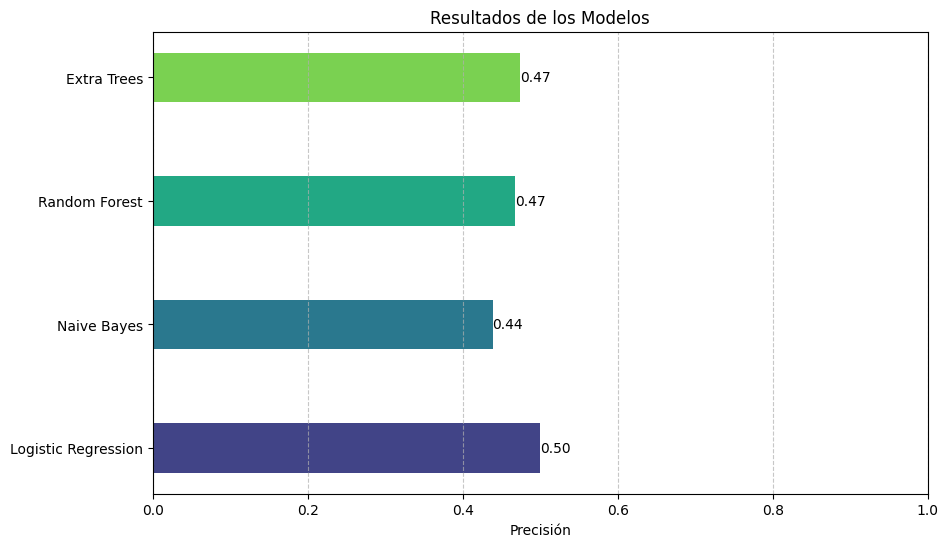

In [105]:
plot_results_from_training(results)

# NER (Name Entity Recognition)

In [26]:
import spacy

In [27]:
nlp = spacy.load("en_core_web_sm")

In [28]:
def extract_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents]

In [29]:
df["entities"] = df["lemmatized_post"].apply(extract_entities)

In [30]:
df["entities"].to_csv("Datasets/entities.csv", index=False)

In [32]:
df["entities"]

0                                   []
1                                   []
2                                   []
3                                   []
4         [anova nonparametric, intro]
                      ...             
274198                              []
274199                              []
274200                         [ec ec]
274201                              []
274202                              []
Name: entities, Length: 272298, dtype: object

In [214]:
#X_entities = df["entities"].apply(lambda x: nlp(" ".join(x)).vector)

#4 min

In [219]:
#X_entities

0         [-1.3461316, -0.30266666, 0.47851875, -0.65454...
1         [-0.23316477, -0.34370387, 0.9264083, 0.067182...
2                                                        []
3         [-0.11310771, -0.20024587, 0.8450012, 0.202108...
4         [-0.3689766, -0.48273215, -0.01269875, -0.0091...
                                ...                        
274198                                                   []
274199    [-0.2754597, -0.17501661, 0.18610168, 0.560066...
274200    [-0.5508354, -1.2143576, 0.76666623, 0.7847884...
274201                                                   []
274202                                                   []
Name: entities, Length: 272514, dtype: object

In [31]:
def text_to_embeddings(text):
    doc = nlp(text)
    return doc.vector

In [38]:
X_embeddings = df["lemmatized_post"].apply(text_to_embeddings)
#25 min

In [36]:
cv = TfidfVectorizer(max_features=1000)
X_cv = cv.fit_transform(df["entities"].apply(lambda x: " ".join(x)))

In [106]:
results = train_models(X_cv, Y)

Entrenando: Logistic Regression
Tiempo de entrenamiento de Logistic Regression: 9.55s
Logistic Regression Accuracy: 0.19
Logistic Regression F1 Score: 0.15
                      precision    recall  f1-score   support

       AskStatistics       0.37      0.09      0.14      8894
     DataScienceJobs       0.62      0.21      0.31       669
         MLQuestions       0.19      0.00      0.00      3445
     MachineLearning       0.29      0.14      0.19     11155
           analytics       0.42      0.21      0.28      2413
          artificial       0.37      0.02      0.05      2581
     computerscience       0.43      0.10      0.16      6771
      computervision       0.29      0.03      0.06      2829
                data       0.73      0.12      0.21       811
        dataanalysis       0.00      0.00      0.00      1138
     dataengineering       0.48      0.08      0.14      2443
         datascience       0.15      0.87      0.26     11260
  datascienceproject       0.00      

/Users/ivan/Desktop/2_CDIA/NLP/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ivan/Desktop/2_CDIA/NLP/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ivan/Desktop/2_CDIA/NLP/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

Tiempo de entrenamiento de Random Forest: 8.78s
Random Forest Accuracy: 0.19
Random Forest F1 Score: 0.14
                      precision    recall  f1-score   support

       AskStatistics       0.37      0.08      0.14      8894
     DataScienceJobs       0.49      0.25      0.33       669
         MLQuestions       0.13      0.01      0.02      3445
     MachineLearning       0.30      0.12      0.17     11155
           analytics       0.40      0.21      0.28      2413
          artificial       0.18      0.02      0.04      2581
     computerscience       0.39      0.09      0.15      6771
      computervision       0.27      0.05      0.08      2829
                data       0.74      0.15      0.25       811
        dataanalysis       0.12      0.01      0.01      1138
     dataengineering       0.42      0.08      0.14      2443
         datascience       0.15      0.85      0.25     11260
  datascienceproject       0.00      0.00      0.00        77
            datasets     

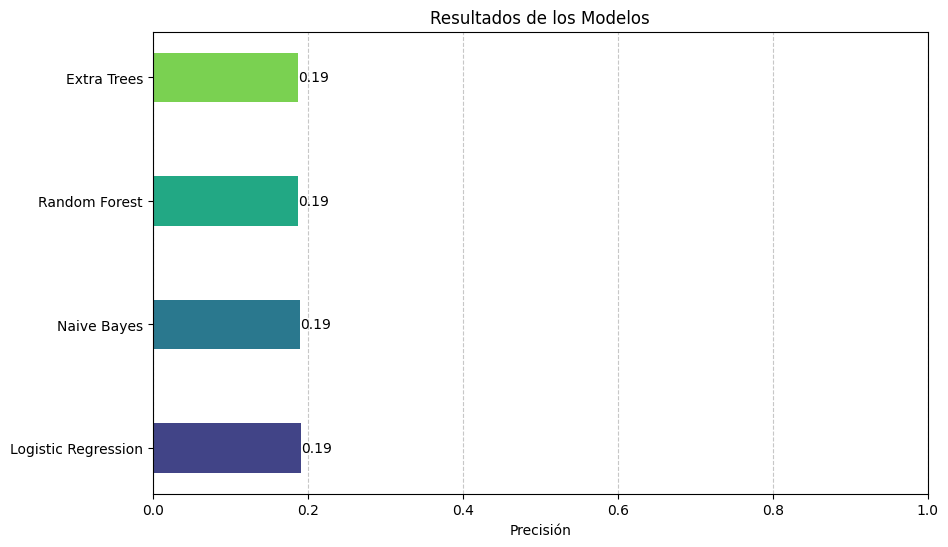

In [107]:
plot_results_from_training(results)

In [108]:
X_embeddings = np.array(X_embeddings.tolist())

In [111]:
results = train_models(X_embeddings, Y)

Entrenando: Logistic Regression
Tiempo de entrenamiento de Logistic Regression: 28.47s
Logistic Regression Accuracy: 0.27
Logistic Regression F1 Score: 0.24
                      precision    recall  f1-score   support

       AskStatistics       0.29      0.40      0.34      8894
     DataScienceJobs       0.70      0.45      0.55       669
         MLQuestions       0.11      0.00      0.00      3445
     MachineLearning       0.24      0.46      0.31     11155
           analytics       0.33      0.06      0.11      2413
          artificial       0.38      0.11      0.17      2581
     computerscience       0.30      0.26      0.28      6771
      computervision       0.19      0.03      0.05      2829
                data       0.73      0.11      0.19       811
        dataanalysis       0.08      0.00      0.01      1138
     dataengineering       0.20      0.03      0.05      2443
         datascience       0.28      0.53      0.36     11260
  datascienceproject       0.00     

/Users/ivan/Desktop/2_CDIA/NLP/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ivan/Desktop/2_CDIA/NLP/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ivan/Desktop/2_CDIA/NLP/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

Tiempo de entrenamiento de Random Forest: 32.32s
Random Forest Accuracy: 0.23
Random Forest F1 Score: 0.20
                      precision    recall  f1-score   support

       AskStatistics       0.23      0.32      0.27      8894
     DataScienceJobs       0.79      0.48      0.60       669
         MLQuestions       0.05      0.01      0.01      3445
     MachineLearning       0.21      0.38      0.27     11155
           analytics       0.36      0.02      0.03      2413
          artificial       0.22      0.04      0.07      2581
     computerscience       0.24      0.22      0.23      6771
      computervision       0.16      0.02      0.03      2829
                data       0.63      0.19      0.29       811
        dataanalysis       0.11      0.01      0.02      1138
     dataengineering       0.26      0.01      0.03      2443
         datascience       0.26      0.48      0.34     11260
  datascienceproject       0.12      0.04      0.06        77
            datasets    

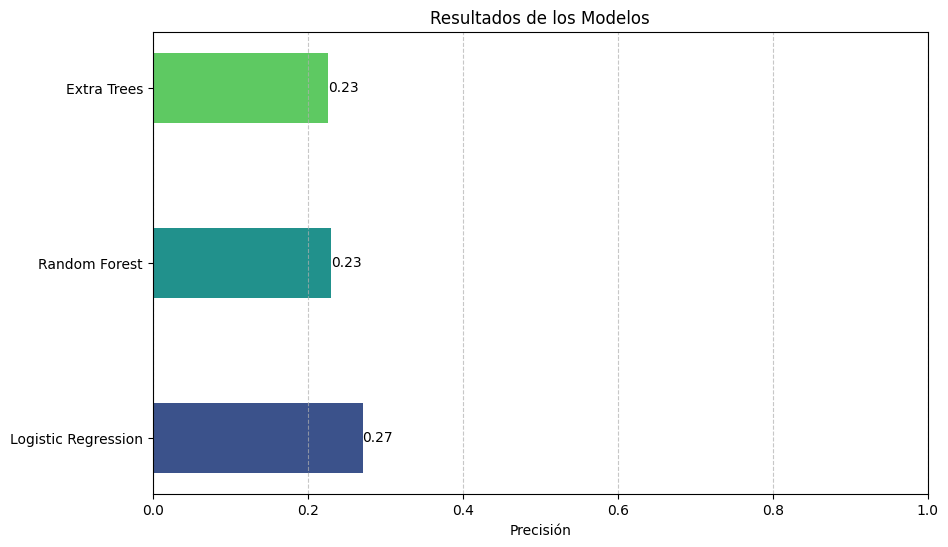

In [112]:
plot_results_from_training(results)

In [121]:
def load_glove():
    with open("Datasets/glove.6B.300d.txt", "r") as file:
        embeddings = {}
        for line in file:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=np.float32)
            embeddings[word] = vector
            
        return embeddings
    

embeddings = load_glove()

def text_to_glove(text):
    words = text.split()
    vectors = [embeddings[word] for word in words if word in embeddings]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(300)

In [123]:
X_glove = df["lemmatized_post"].apply(text_to_glove)

X_glove = np.array(X_glove.tolist())

In [124]:
results = train_models(X_glove, Y)

Entrenando: Logistic Regression
Tiempo de entrenamiento de Logistic Regression: 109.42s
Logistic Regression Accuracy: 0.45
Logistic Regression F1 Score: 0.43
                      precision    recall  f1-score   support

       AskStatistics       0.47      0.57      0.51      8894
     DataScienceJobs       0.75      0.51      0.60       669
         MLQuestions       0.14      0.01      0.01      3445
     MachineLearning       0.38      0.54      0.44     11155
           analytics       0.64      0.53      0.58      2413
          artificial       0.55      0.34      0.42      2581
     computerscience       0.54      0.64      0.58      6771
      computervision       0.48      0.39      0.43      2829
                data       0.66      0.21      0.32       811
        dataanalysis       0.26      0.04      0.07      1138
     dataengineering       0.57      0.45      0.50      2443
         datascience       0.46      0.59      0.52     11260
  datascienceproject       0.00    

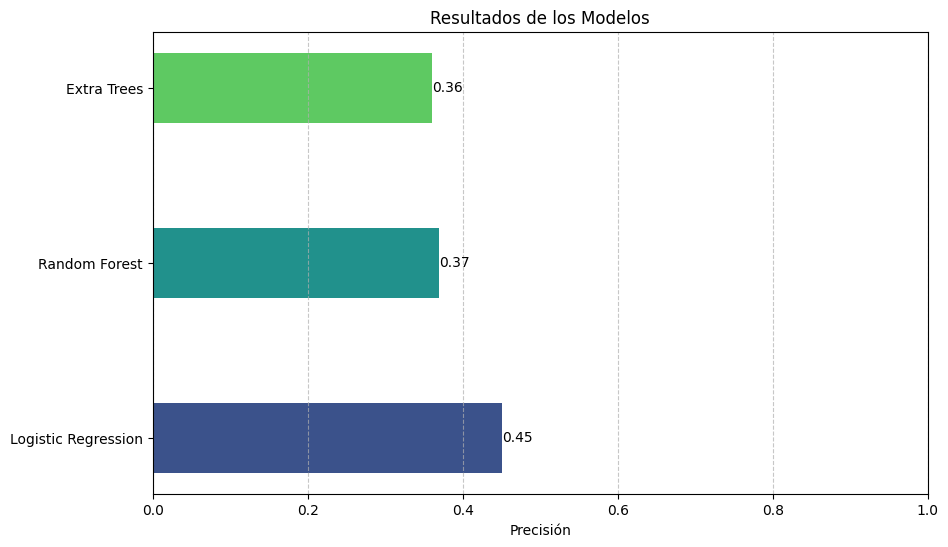

In [125]:
plot_results_from_training(results)